In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [9]:
baseball_df = pd.read_csv('C:/Users/Cloud/Documents/ML-group/data/cleanedFull.csv')
baseball_df = baseball_df.drop(columns=['Unnamed: 0', 'opp_ScoreLine'])
baseball_df

,JOIN,doubleheader,temperature_fahrenheit,season_game_number,days_since_last_game,pitches_p,ba_p,iso_p,babip_p,slg_p,...,swings_h,takes_h,eff_min_vel_h,release_extension_h,pitcher_run_exp_h,run_exp_h,duration,score,opp_score,winLoss_numeric
0,45015BALDH0,0,38,1,1.0,153,0.324,0.118,0.407,0.441,...,78,113,-6.5,6.65,-5.5,5.5,190,10,9,1
1,45015BOSDH0,0,38,1,1.0,191,0.395,0.263,0.464,0.658,...,72,81,-2.7,6.52,-2.4,2.4,190,9,10,0
2,45015CHCDH0,0,42,1,1.0,133,0.138,0.000,0.235,0.138,...,59,65,0.5,6.47,0.6,-0.6,141,4,0,1
3,45015MILDH0,0,42,1,1.0,124,0.200,0.000,0.240,0.200,...,59,74,-0.3,5.91,4.9,-4.9,141,0,4,0
4,45015CINDH0,0,61,1,1.0,178,0.200,0.133,0.263,0.333,...,74,91,0.2,6.43,0.1,-0.1,182,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,45200SFDH0,0,64,162,1.0,173,0.206,0.088,0.240,0.294,...,64,73,0.7,6.66,2.4,-2.4,164,2,5,0
4856,45200TBDH0,0,79,162,1.0,155,0.300,0.225,0.344,0.525,...,79,87,0.2,6.57,-5.9,5.9,167,12,8,1
4857,45200TORDH0,0,79,162,1.0,166,0.372,0.302,0.419,0.674,...,76,79,0.5,6.82,-3.1,3.1,167,8,12,0
4858,45200ATLDH0,0,81,162,1.0,165,0.385,0.103,0.395,0.487,...,87,80,-0.2,6.27,-4.4,4.4,189,9,10,0


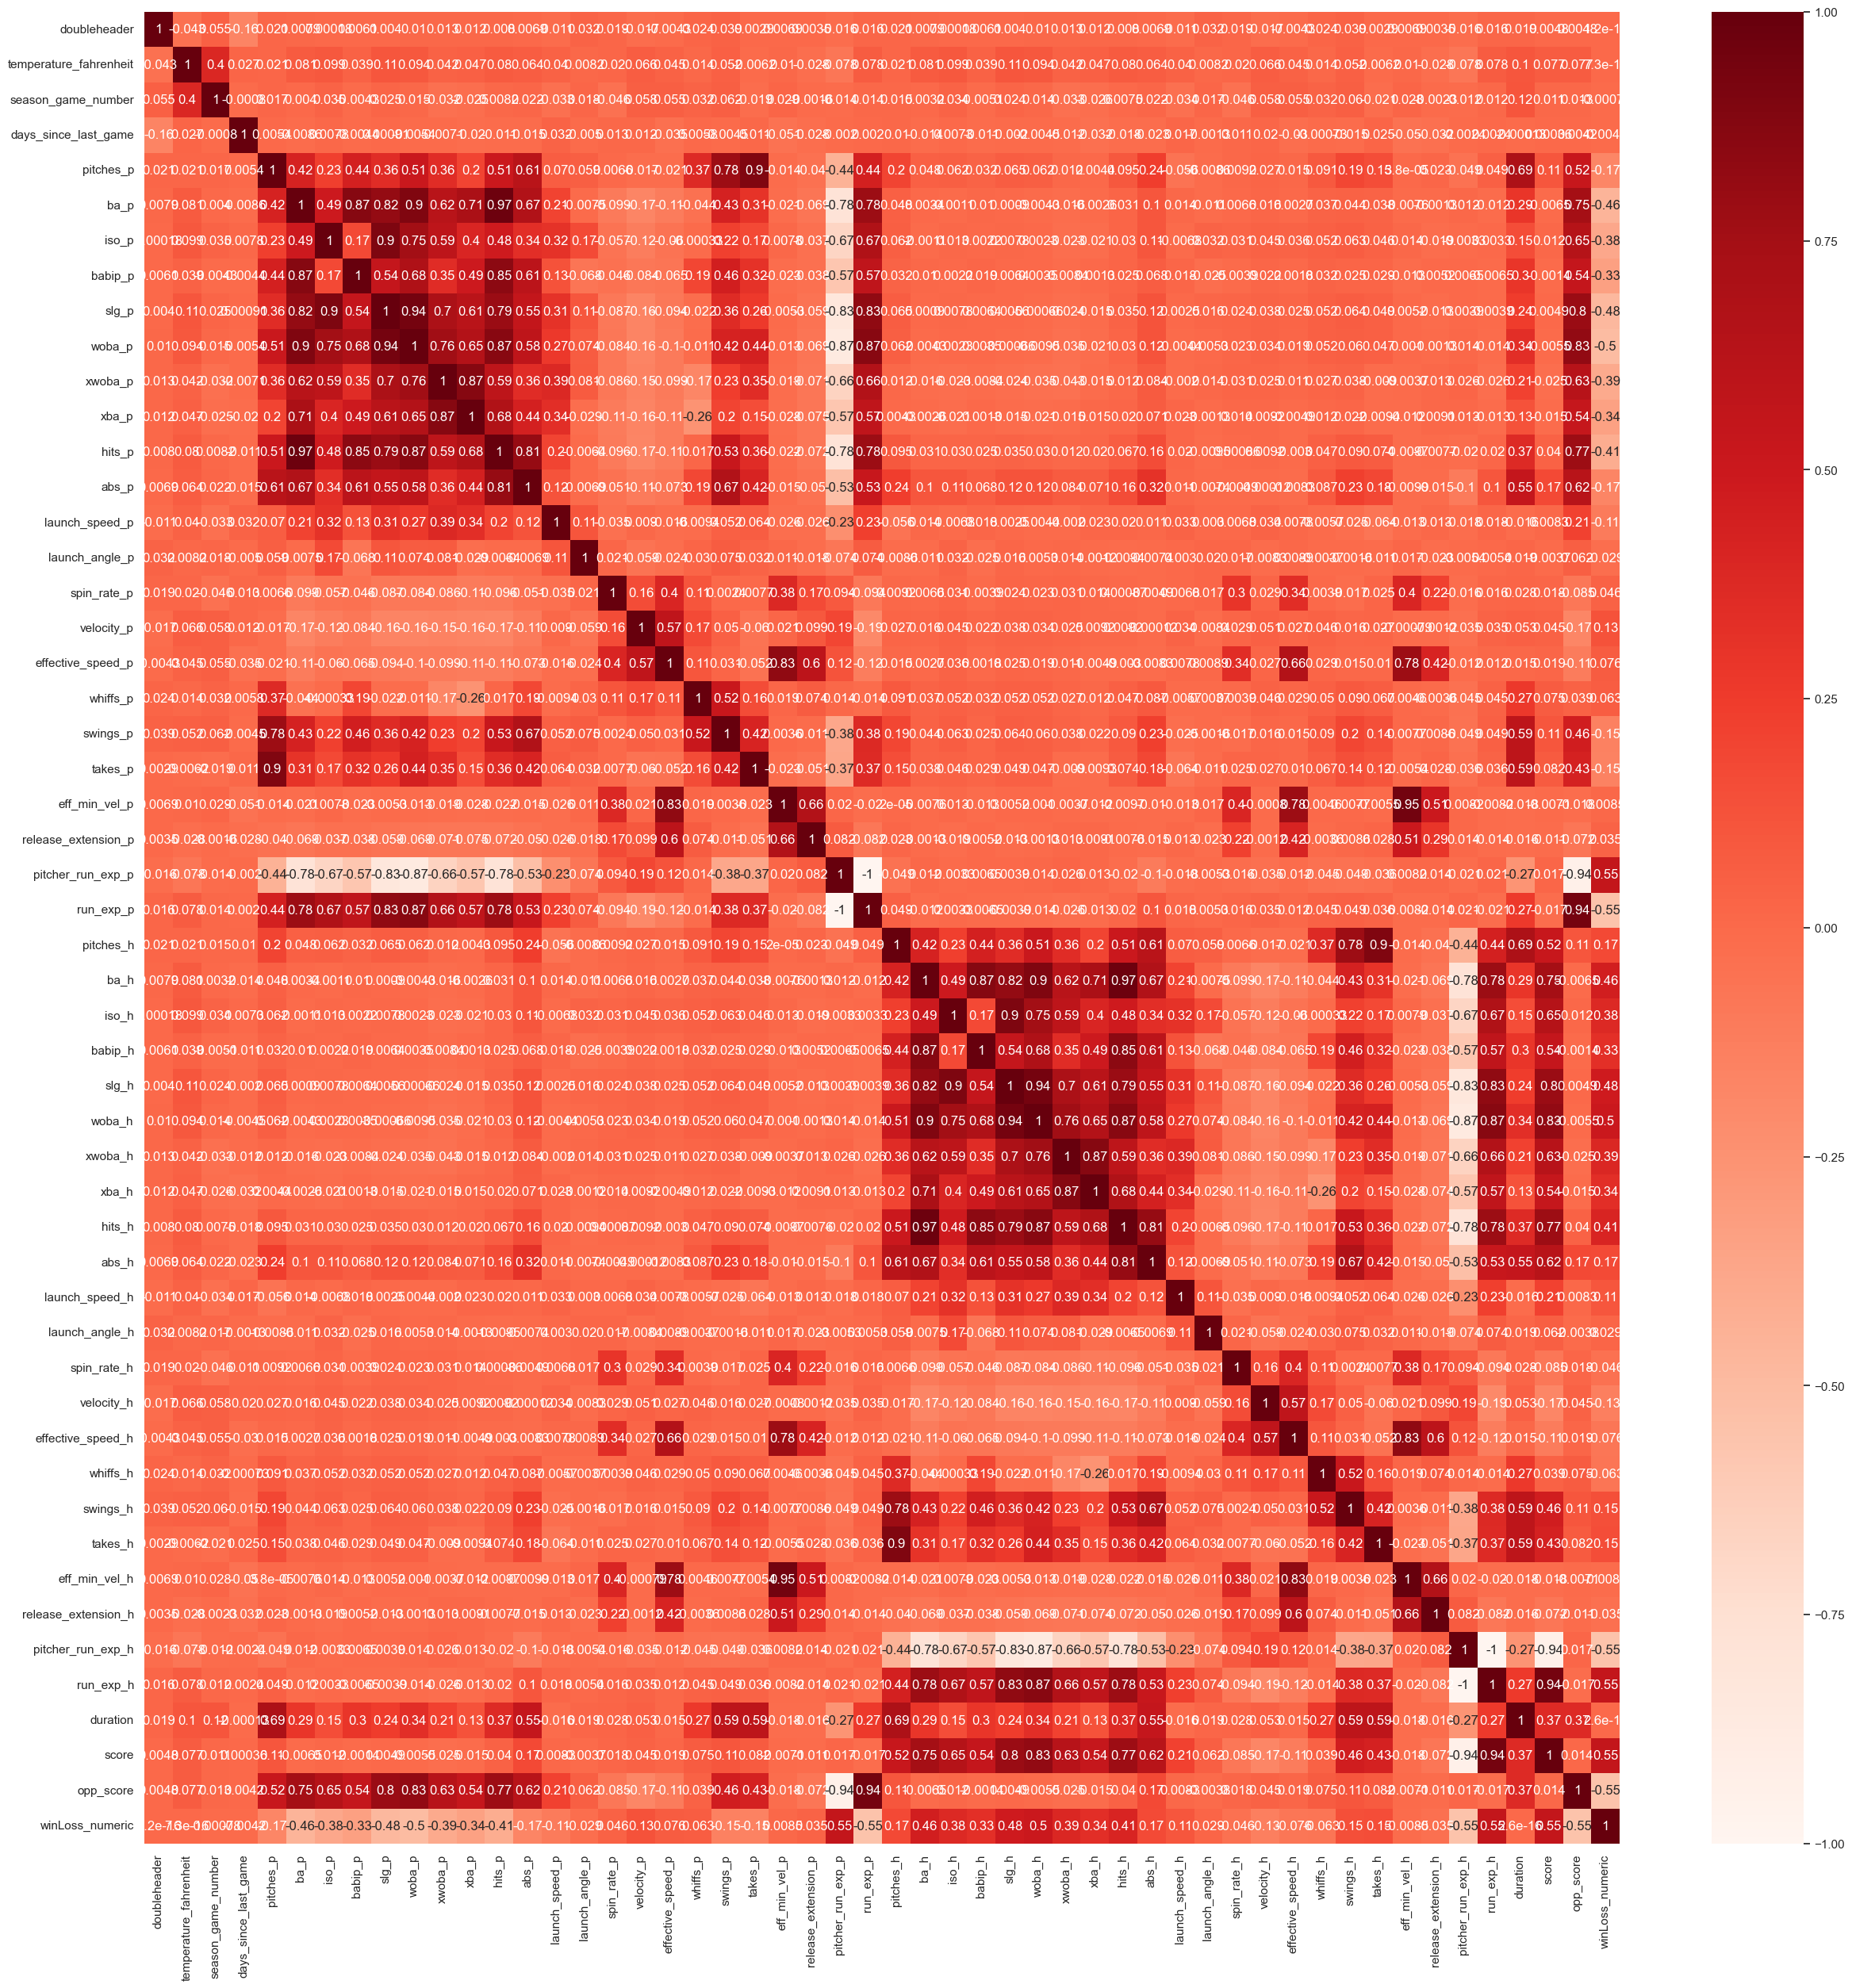

In [10]:
#plot a correlation matrix
import seaborn as sns

only_num_df = baseball_df.drop(columns=['JOIN'])

plt.figure(figsize=(30,30))
cor = only_num_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [22]:
cor_target = abs(cor["winLoss_numeric"])
# Selecting highly correlated features, sorting in ascending order, and converting to list format
relevant_features = cor_target[cor_target > 0.3].sort_values()
relevant_features_list = relevant_features.index.tolist()
print(relevant_features_list)

['babip_p', 'babip_h', 'xba_h', 'xba_p', 'iso_p', 'iso_h', 'xwoba_p', 'xwoba_h', 'hits_p', 'hits_h', 'ba_h', 'ba_p', 'slg_p', 'slg_h', 'woba_h', 'woba_p', 'score', 'opp_score', 'run_exp_p', 'pitcher_run_exp_p', 'pitcher_run_exp_h', 'run_exp_h', 'winLoss_numeric']


In [12]:
#Binary Classification 

#Creating new columns that are combinations of other columns to be used later
baseball_df['score-run_exp_p'] = baseball_df['score'] - baseball_df['run_exp_p']
baseball_df['score-run_exp_p*woba_p'] = baseball_df['score-run_exp_p'] * baseball_df['woba_p']

#Splitting the data into a training set and a testing set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(baseball_df, test_size=0.2, random_state=42)

#Setting up training and testing data to use
x_train = train_set[['score']]
y_train = train_set[['winLoss_numeric']]
x_test = test_set[['score']]
y_test = test_set[['winLoss_numeric']]
y_train_1 = (y_train == 1).to_numpy().ravel()
y_test_1 = (y_test == 1).to_numpy().ravel()

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_1)

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_1, cv=3, scoring="accuracy")

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_1, cv=3)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_1, y_train_pred)
cm

array([[1397,  527],
       [ 414, 1550]], dtype=int64)

In [13]:
#This means that given the Home team's score the model can accurately predict the winner almost 75% of the time
TN, FP, FN, TP = confusion_matrix(y_train_1, y_train_pred).ravel()
accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the Binary Classifier = {:0.3f}'.format(accuracy))

from sklearn.metrics import precision_score, recall_score
print('Precision Score:', precision_score(y_train_1, y_train_pred))
print('Recall Score: ', recall_score(y_train_1, y_train_pred))

from sklearn.metrics import f1_score
print('F1 Score: ', f1_score(y_train_1, y_train_pred))

Accuracy of the Binary Classifier = 0.758
Precision Score: 0.746268656716418
Recall Score:  0.7892057026476579
F1 Score:  0.767136847315021


In [14]:
#We will now attempt to predict the win based on runs expected
x_train2 = train_set[['run_exp_p']]
x_test2 = test_set[['run_exp_p']]

cross_val_score(sgd_clf, x_train2, y_train_1, cv=3, scoring="accuracy")

y_train_pred2 = cross_val_predict(sgd_clf, x_train2, y_train_1, cv=3)

cm2 = confusion_matrix(y_train_1, y_train_pred2)
cm2

array([[1330,  594],
       [ 367, 1597]], dtype=int64)

In [15]:
#This result is only slightly worse than the result of predicting win based on runs, meaning combining the two should prove to be very effective
TN2, FP2, FN2, TP2 = confusion_matrix(y_train_1, y_train_pred2).ravel()
accuracy =  (TP2 + TN2) / (TP2 + FP2 + TN2 + FN2)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

print('Precision Score:', precision_score(y_train_1, y_train_pred2))
print('Recall Score: ', recall_score(y_train_1, y_train_pred2))
print('F1 Score: ', f1_score(y_train_1, y_train_pred2))

Accuracy of the binary classifier = 0.753
Precision Score: 0.72889091738932
Recall Score:  0.8131364562118126
F1 Score:  0.7687123947051744


In [16]:
#We will now attempt to predict the win based on actual score - expected score
x_train3 = train_set[['score-run_exp_p']]
x_test3 = test_set[['score-run_exp_p']]

y_train_pred3 = cross_val_predict(sgd_clf, x_train3, y_train_1, cv=3)

cm3 = confusion_matrix(y_train_1, y_train_pred3)
cm3

array([[1848,   76],
       [ 106, 1858]], dtype=int64)

In [17]:
#By combining two columns into one we were able to get our accuracy to go up around 20% from just using one column
#Producting ~95% accuracy, a quite impressive score for a simple binary classifier
TN3, FP3, FN3, TP3 = confusion_matrix(y_train_1, y_train_pred3).ravel()
accuracy =  (TP3 + TN3) / (TP3 + FP3 + TN3 + FN3)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

print('Precision Score:', precision_score(y_train_1, y_train_pred3))
print('Recall Score: ', recall_score(y_train_1, y_train_pred3))
print('F1 Score: ', f1_score(y_train_1, y_train_pred3))

Accuracy of the binary classifier = 0.953
Precision Score: 0.9607032057911065
Recall Score:  0.9460285132382892
F1 Score:  0.953309389430477


In [18]:
#We will attempt to predict a win based on a combination of three columns and see what happens
x_train4 = train_set[['score-run_exp_p*woba_p']]
x_test4 = test_set[['score-run_exp_p*woba_p']]

y_train_pred4 = cross_val_predict(sgd_clf, x_train4, y_train_1, cv=3)

cm4 = confusion_matrix(y_train_1, y_train_pred4)
cm4

array([[1615,  309],
       [ 183, 1781]], dtype=int64)

In [19]:
#We can see here that adding an additional column to the binary classifier actually makes the system less accurate since the
#relationship loses some meaning when it isn't just one column vs another like it is with two columns 
TN4, FP4, FN4, TP4 = confusion_matrix(y_train_1, y_train_pred4).ravel()
accuracy =  (TP4 + TN4) / (TP4 + FP4 + TN4 + FN4)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))
print('Precision Score:', precision_score(y_train_1, y_train_pred4))
print('Recall Score: ', recall_score(y_train_1, y_train_pred4))
print('F1 Score: ', f1_score(y_train_1, y_train_pred4))

Accuracy of the binary classifier = 0.873
Precision Score: 0.8521531100478469
Recall Score:  0.9068228105906314
F1 Score:  0.8786383818450912
